# Chaînes de Markov : propagation d’une épidémie dans une population
Groupe 3

**Haya MAMLOUK** - 21107689

**Maeva RAMAHATAFANDRY** - 21104443


## 1. Description du premier modèle

1. Dans le cadre de ce modèle épidémique:
- il y'a 3 états: **Sain (S), Infecté (I) et Guéri (R)**. 
- Le vecteur de probabilité initiale est de taille 3 représentant chaque état au temps 0. 
- La matrice de transition est de taille 3 x 3: on peut rentrer selon 3 états (S, I , R) et sortir selon 3 états. 

2. pi0 : vecteur de probabilité initiale:


``` python
    pi0 = [0.9, 0.1, 0.0]
```


3. Matrice de transition 1 contenant les probabilités de transition entre les différentes états:

``` python
    A = numpy.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0, 0, 1]
    ])
```



In [1]:
# PARAMÈTRES DU CODE
import numpy as np
import random
import matplotlib.pyplot as plt
import statistics

pi0 = [0.9, 0.1, 0.0]

A = np.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0, 0, 1]
    ])


In [2]:
def est_stochastique(A):
    """
    Cette fonction renvoie 1 si A est une matrice stochastique (matrice carrée et la somme des éléments d'une ligne  = 1) et 0 sinon

    Paramètres: 
    ------------
    A : np.array
    Matrice à vérifier

    Returns:
    ------------
    boolean

    """
    sum : int = 0
    if A.shape[0] == A.shape[1]: 
        for i in A: #i = valeur ligne, j = valeur colonne
            for j in i:
                sum += j
            print(sum)
            if sum != 1:
                return False
            else :
                sum = 0
        return True
    return False

assert(est_stochastique(A) == True)


1.0
1.0
1.0


### 1.1 Distribution théorique

#### Question 1 : Calcul de la distribution théoriques des états pour t = 1

La probabilité pour un individu d'être **sain** au temps t = 1 est:

$ P(S_1) = P(S_1 | S_0) * P(S_0) = 0.9 * 0.92 = 0.828 $


La probabilité pour un individu d'être **infecté** au temps t = 1 est: 

$   P(I_1) = P(I_1| S_0) * P(S_0) + P(I_1 | I_0) * P(I_0) = 0.08 * 0.9 + 0.93 * 0.1  = 0.072 + 0.093 = 0.165 $


La probabilité pour un individu d'être **guéri** au temps = 1 est:

$   P(R_1) = P(R_1 | I_0) * P(I_0) = 0.07 * 0.1 = 0.007 $



#### Question 2 : Calcul de la distribution théoriques des états pour t = 2

La probabilité pour un individu d'être **sain** au temps t = 2 est:

$   P(S_2) = P(S_2 | S_1) * P(S_1) =  0.92 * 0.828 = 0.762 $ 


La probabilité pour un individu d'être **infecté** au temps t = 2 est: 

$   P(I_2) = P(I_2| S_1) * P(S_1) + P(I_2 | I_1) * P(I_1) = 0.08 * 0.828 + 0.93 * 0.165 = 0.06624 + 0.15345 = 0.21969 $


La probabilité pour un individu d'être **guéri** au temps = 1 est:

$   P(R_2) = P(R_2| I_1) * P(I_1) + P(R_2 | R_1) * P(R_1) = 0.07 * 0.165 + 0.007 * 1 = 0.01855 $


#### Question 3: Calcul des distributions théoriques des états pour t entre 1 et 200

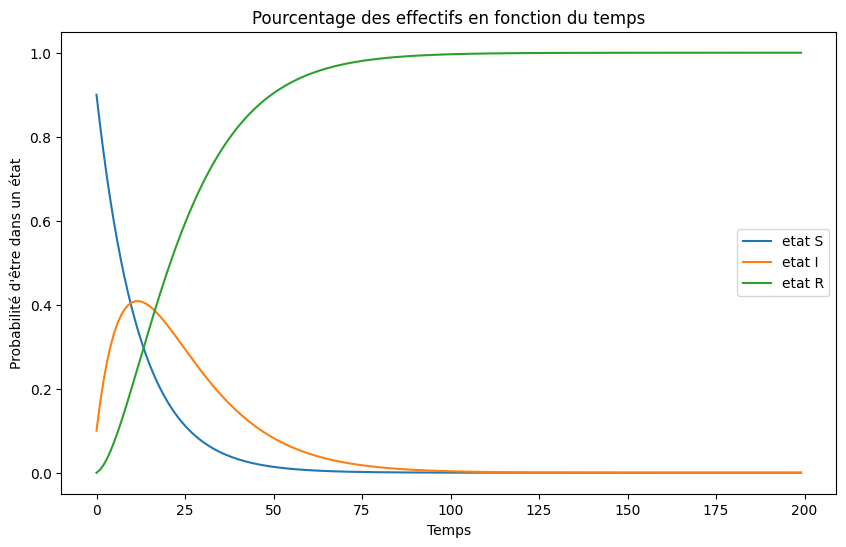

In [3]:
def distribution_etat(A, vect_init):
    liste_distribution = []
    liste_distribution.append(np.array(vect_init))

    for i in range(1, 200): 
        liste_distribution.append(np.dot(liste_distribution[i-1], A))

    return liste_distribution

def affichage_distribution(liste_distribution) :
    #affichage (to review bc copier coller from chatgpt)
    time_steps = np.arange(len(liste_distribution))
    state_labels = ['etat S', 'etat I', 'etat R']
    plt.figure(figsize=(10, 6))
    for state_index in range(len(liste_distribution[0])):
        state_probabilities = [distribution[state_index] for distribution in liste_distribution]
        plt.plot(time_steps, state_probabilities, label=state_labels[state_index])

    plt.title('Pourcentage des effectifs en fonction du temps')
    plt.xlabel('Temps')
    plt.ylabel("Probabilité d'être dans un état")
    plt.legend()
    plt.show()

liste_distribution = distribution_etat(A, pi0)
affichage_distribution(liste_distribution)

### 1.2 Distibution Observée
#### 1.2.1 Tirage aléatoire des états

In [4]:
def seq_alea_individu(T, pi0, transition) :

    states  = ['S', 'I', 'R']
    res = [random.choices(states, weights=pi0, k=1)[0]]

    transition_weights = {'S': transition[0], 'I': transition[1], 'R': transition[2]}

    for i in range(1, T + 1):
        current_state = res[i - 1]
        next_state = random.choices(states, weights=transition_weights[current_state], k=1)[0]
        res.append(next_state)
    return res
    
seq_alea_individu(150, pi0, A)

['I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R']

#### 1.2.2 Modélisation d’une population
##### Question 1 : Nombre d'individus sains, infectés et guéris et répartition de la population

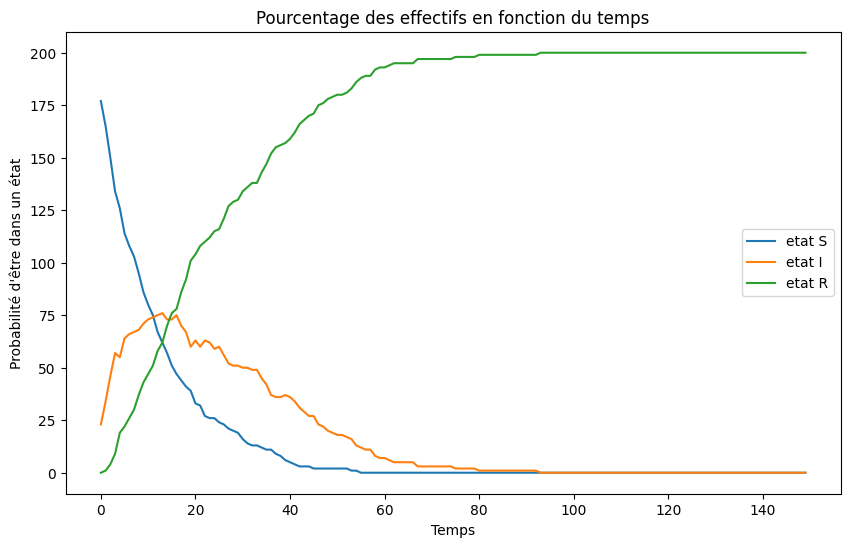

In [5]:
def seq_alea_population(nb_individus, temps, pi0, A):
    res = []
    for i in range(nb_individus+1):
        res.append(seq_alea_individu(temps, pi0, A))
    return res

def distribution_population(seq_population : list(list()), temps, nb_individus):
    res = []

    for j in range(temps):
        tab_temps = np.zeros(3)
        for i in range(nb_individus):
            if seq_population[i][j] == 'S':
                tab_temps[0] += 1
            elif seq_population[i][j] == 'I':
                tab_temps[1] += 1
            else:
                tab_temps[2] += 1
        res.append(tab_temps)
        
    return res

#tests
population = seq_alea_population(200, 150, pi0, A)
distribution = distribution_population(population, 150, 200)
affichage_distribution(distribution)

##### Question 2: Affichage des pourcentages

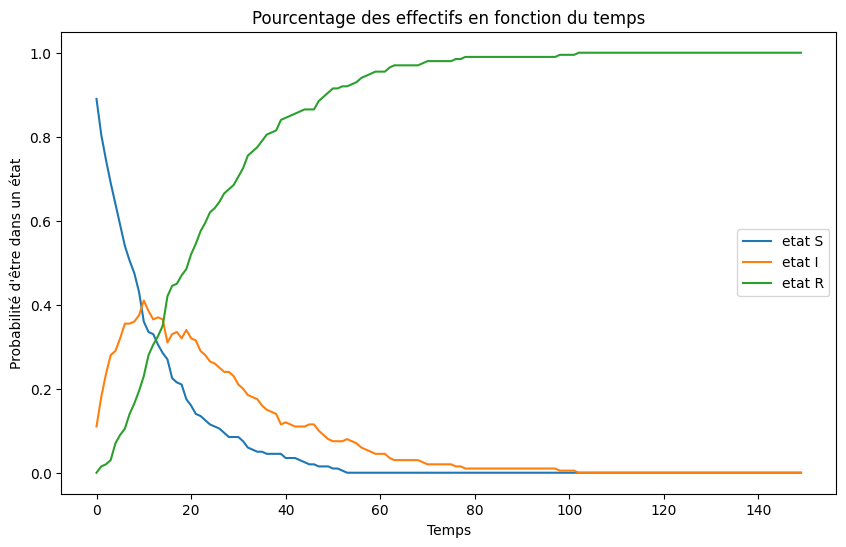

In [6]:
def pourcentages_population(repartition_population, nb_individus):
    for temps in repartition_population:
        for i in range(3):
            temps[i] /= nb_individus
    return repartition_population

population = seq_alea_population(200, 150, pi0, A)
distribution = distribution_population(population, 150, 200)
pourcentages = pourcentages_population(distribution, 200)
affichage_distribution(pourcentages)

##### Question 3
Quand t est très grand, la globalité de la population converge vers R: le nombre d'individus sains et infectés se rapprochent de 0% et le pourcentage d'invividus guéris se rapprochent de 100%. R est un état récurrent.

##### Question 4: expérience avec une population de 5 individus et 5000

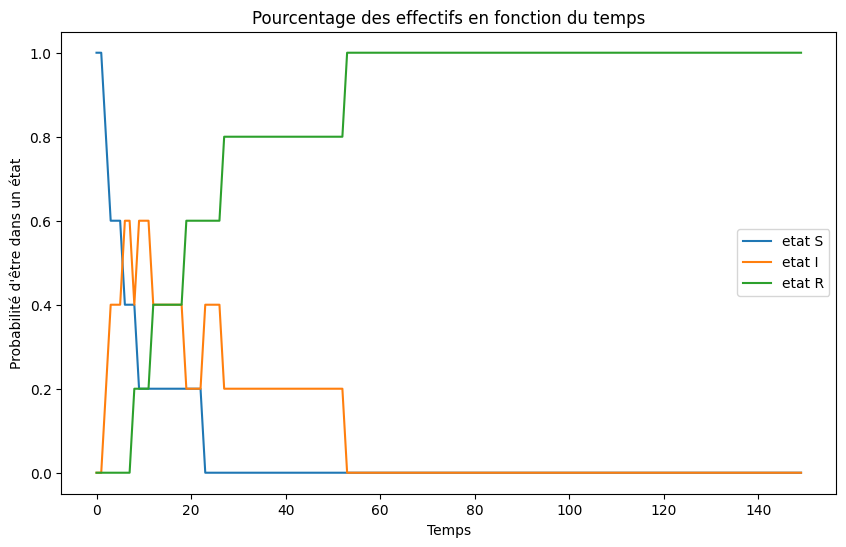

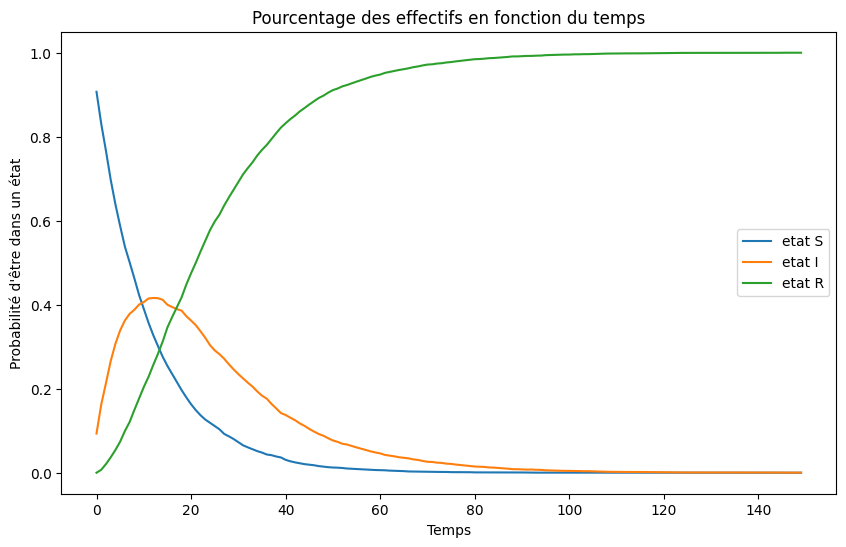

In [7]:
def simulation(nb_individus, temps, A):
    population = seq_alea_population(nb_individus, temps, pi0, A)
    distribution = distribution_population(population, temps, nb_individus)
    pourcentages = pourcentages_population(distribution, nb_individus)
    return pourcentages

# avec 5 individus:
affichage_distribution(simulation(5, 150, A))

# avec 5000 individus
affichage_distribution(simulation(5000, 150, A))

## 1.3 Longueur de l'infection
##### Question 1: Longueur moyenne d'une séquence de I

In [8]:
def longueur_I_obs(nb_individus, temps):
    I_moyen = []
    pop = seq_alea_population(nb_individus, temps, pi0, A)
    
    for i in range(nb_individus):
        total_inf = 0 
        for j in range(temps):
            seq_inf = [etat for etat in pop[i][j] if etat == 'I']
            inf = len(seq_inf)
            total_inf += inf  #nb seq 'I' pour chaque individu
       
        I_moyen.append(total_inf)  

    return statistics.mean(I_moyen), I_moyen

longueur_I_obs(150, 200)
    
    

(15.4,
 [8,
  8,
  31,
  11,
  15,
  3,
  99,
  6,
  29,
  15,
  4,
  20,
  3,
  15,
  58,
  13,
  15,
  16,
  7,
  13,
  11,
  16,
  2,
  9,
  14,
  10,
  10,
  47,
  18,
  4,
  15,
  28,
  6,
  6,
  4,
  20,
  7,
  11,
  12,
  43,
  5,
  2,
  10,
  5,
  12,
  45,
  12,
  2,
  6,
  18,
  3,
  29,
  6,
  6,
  1,
  14,
  55,
  7,
  17,
  8,
  1,
  9,
  11,
  4,
  36,
  5,
  7,
  10,
  9,
  10,
  18,
  14,
  27,
  6,
  21,
  22,
  4,
  2,
  12,
  10,
  1,
  14,
  17,
  20,
  19,
  31,
  3,
  7,
  21,
  10,
  13,
  25,
  7,
  7,
  9,
  42,
  42,
  7,
  2,
  39,
  17,
  4,
  9,
  3,
  10,
  37,
  16,
  5,
  5,
  25,
  4,
  4,
  23,
  8,
  6,
  9,
  14,
  4,
  1,
  16,
  4,
  145,
  32,
  16,
  1,
  8,
  28,
  13,
  18,
  24,
  12,
  7,
  29,
  43,
  52,
  9,
  4,
  1,
  4,
  30,
  3,
  3,
  11,
  2,
  9,
  29,
  12,
  5,
  9,
  8])

##### Question 2: Longueur théorique d'une séquence I
La longueur théorique d'une séquence I peut être modélisée par une loi géométrique tel que la probabilité de succès est associée à la probabilité de passer de I à R.
Soit L une variable aléatoire représentant la longueur d'une séquence, donc le nombre de I dans une séquence.
P(L=1) = P(R|I) = 0.07 (être infecté une seule fois) 
P(L=2) = P(I|I) x P(R|I) = 0.93 x 0.07 (être infecté deux fois de suite)
P(L=3) = $P(I|I)^2$ x P(R|I) = $0.93^2$ x 0.07 (être infecté trois fois de suite)
P(L=k) = $P(I|I)^{k-1} $ x P(R|I) = $0.93^{k-1}$ x 0.07 (être infecté k fois de suite)

Pour chercher la moyenne de la longueur théorique, on calcule donc l'espérance de la loi géométrique de paramètres 0.07, comme le probabilité de succes, passer de I à R, est de 0.07 .
$Longueur moyenne = 1/0.07 = 14.28$

##### Question 3: Comparaison de la longueur moyenne observée et de la longueur moyenne​ théorique
On peut remarquer que la longueur moyenne observée et la longueur moyenne théorique se rapprochent avec une petite différence , la valeur observée environant 14 et la valeur théorique 14.28.
##### Question 4: Distribution observée de la longueur d'infection

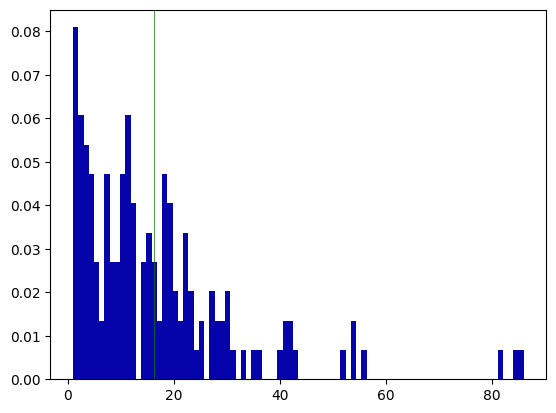

In [9]:
def hist_longueur_I_obs(nb_individus, temps):
    
    # population observée
    moyenne,occurrences = longueur_I_obs(nb_individus, temps)
    plt.axvline(moyenne, color='g', linewidth=0.5, label="Moyenne théorique de la longueur de l'immunité") # moyenne observée
    plt.hist(occurrences, bins=max(occurrences), density=True, color='#0504aa')

hist_longueur_I_obs(150,200)

##### Question 5: Distribution théorique et distribution observée

1. Courbe théorique

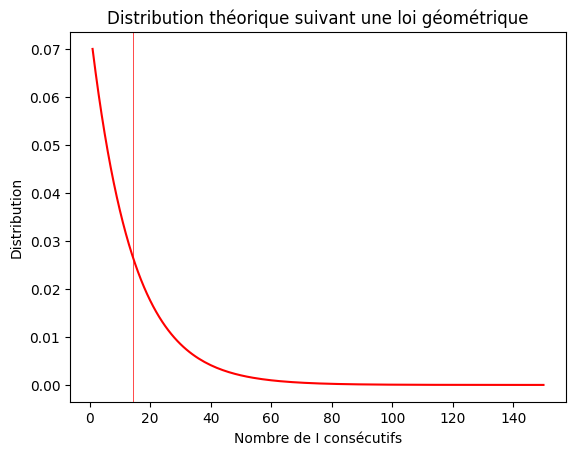

In [10]:
def geometrique(p, k):
    return (1 - p)**(k - 1) * p

def courbe_dist_theorique(temps, p):
    list_distribution = [geometrique(p,k) for k in range(1,temps+1)]
    x = np.arange(1,len(list_distribution)+1)
    y = list_distribution
    plt.plot(x, y, color='red')
    plt.axvline((1/p), color='r', linewidth=0.5, label="Moyenne théorique de la longueur de l'immunité") #moyenne théorique

    plt.title('Distribution théorique suivant une loi géométrique')
    plt.xlabel('Nombre de I consécutifs')
    plt.ylabel("Distribution")

courbe_dist_theorique(150, 0.07) 
    

2. Comparaison des distributions

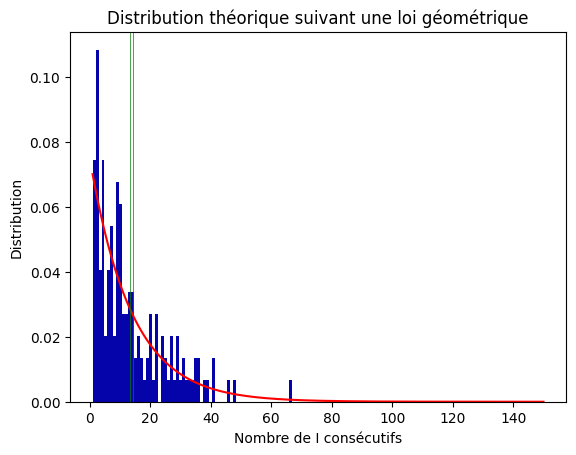

In [11]:
def distribution_long_I_comp(nb_individus, temps, p):
    courbe_dist_theorique(temps, p)
    hist_longueur_I_obs(temps, nb_individus)

distribution_long_I_comp(10000, 150, 0.07)

## Description du second modèle
### 2.1 Analyse du modèle

1. La propriété de Markov d'ordre 1 est vérfiée. Le processus est aléatoire dans un temps discret avec un nombre fini d'états. Nous pouvons bien passer d'un état à un autre. Donc, ce processus peut être modélisé par une chaîne de Markov.

2. Matrice de transition 2 contenant les probabilités de transition entre les différentes états :

``` python
    A = numpy.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0.02, 0, 0.98]
    ])
```

3. Les états de cette chaîne de Markov sont récurrents, nous sommes sûrs de retourner sur un état à un temps donné. La chaîne est bien apériodique (self loop), et tous les états sont communiquants donc elle est irréductible. La chaîne est irréductible et apériodique avec un nombre fini d'états récurrents, donc la chaîne est érgodique .

4. $A^2$ = 
``` python
    numpy.array([
        [0.8464 0.148  0.0056]
        [0.0014 0.8649 0.1337]
        [0.038  0.0016 0.9604]
    ])
```

La matrice $A^2$ correspond à la matrice de probabilités de transition en 2 étapes (temps), donc  $A^2$ = P($X_t$ = $X_{t-2}$)

La matrice est carré et chaque ligne somme à 1. Elle est donc stochastique .

$A^3$ = 
``` python
    numpy.array([
        [0.7788   0.205352 0.015848]
    	[0.003962 0.804469 0.191569]
        [0.054168 0.004528 0.941304]
    ])
```

$A^4$ = 
``` python
    numpy.array([
        [[0.71681296 0.25328136 0.02990568]
        [0.00747642 0.74847313 0.24405045]
        [0.06866064 0.00854448 0.92279488]]
    ])
```

La matrice $A^n$ correspond à la matrice de probabilités de transition en n étapes (temps), donc  $A^n$ = P($X_t$ = $X_{t-n}$).

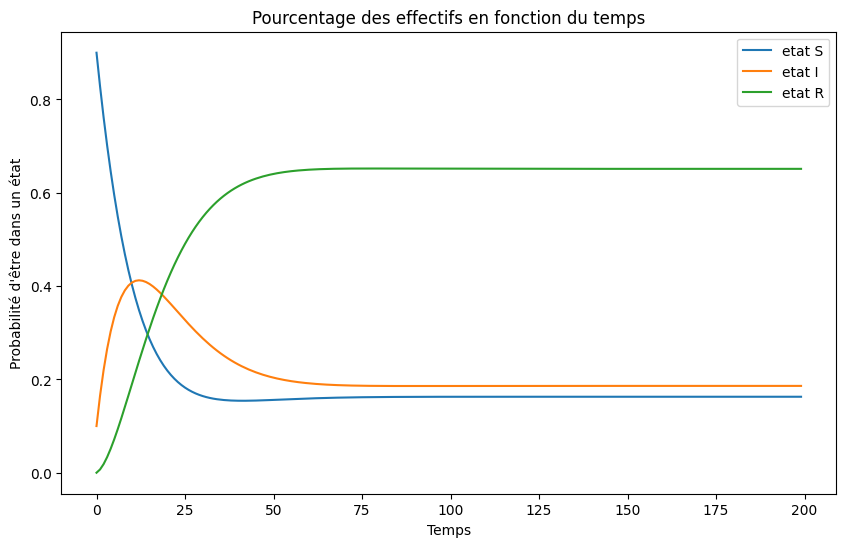

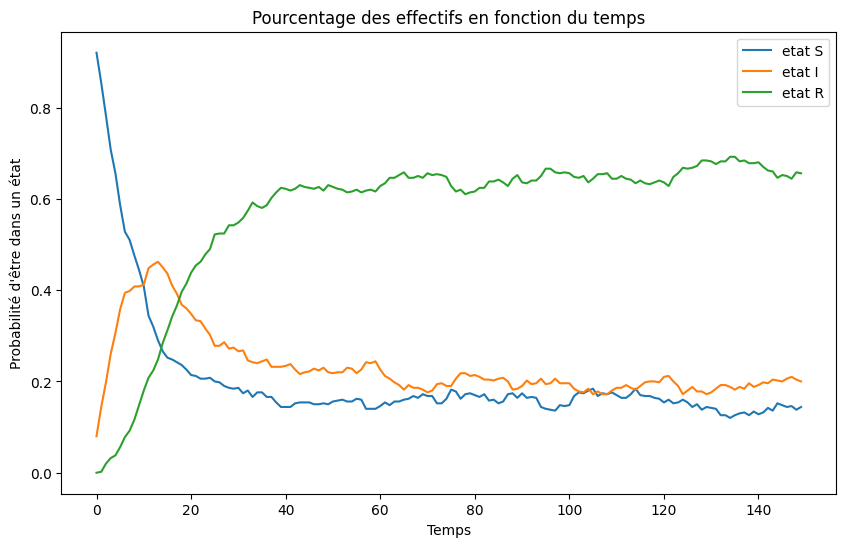

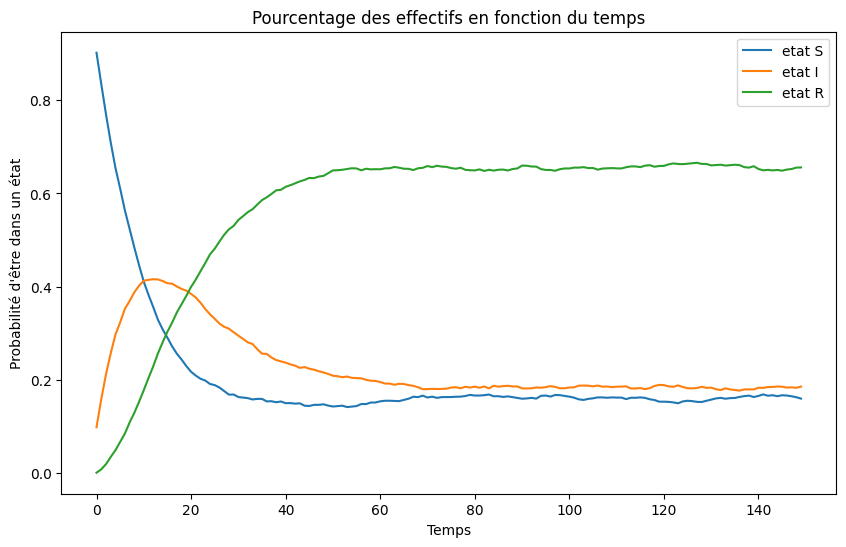

In [12]:
A2 = np.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0.02, 0, 0.98]
    ])

# Distribution théorique 
liste_distribution = distribution_etat(A2, pi0)
affichage_distribution(liste_distribution)

# Distribution observée, simulation avec une population 500 et 5000
affichage_distribution(simulation(500, 150, A2))
affichage_distribution(simulation(5000, 150, A2))

5. En réalisant des nouvelles simulations avec la nouvelle matrice de transition, nous remarquons qu'avec le temps, la probabilité d'être Sain ou Infecté se stabilise autour de 0.2, contrairement aux simulations précédentes dans lesquelles ces probabilités devenaient nulles. La probabilité d'être dans l'état Rétabli reste relativement élevé mais ne vaut plus 1. Cela revient au fait que les individus guéris peuvent redevenir sains avec
une probabilité de 0.02. Donc au fil du temps, la majorité des individus seront guéris, mais certains redeviennet sains en perdant leur immunité face à la maladie, et potentiellement deviennent infectés.

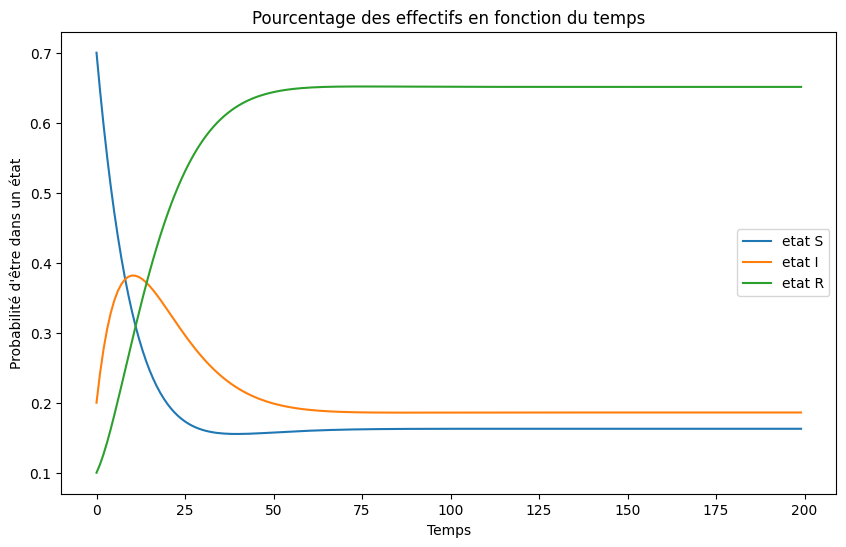

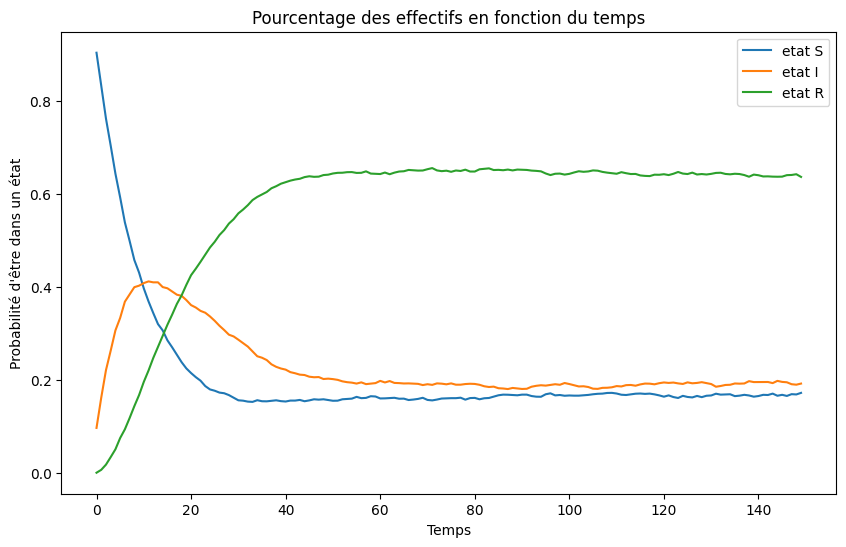

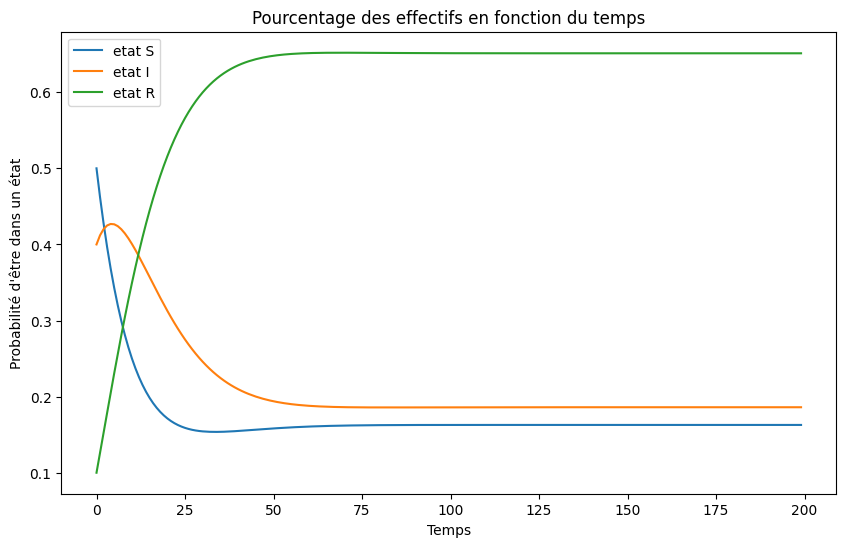

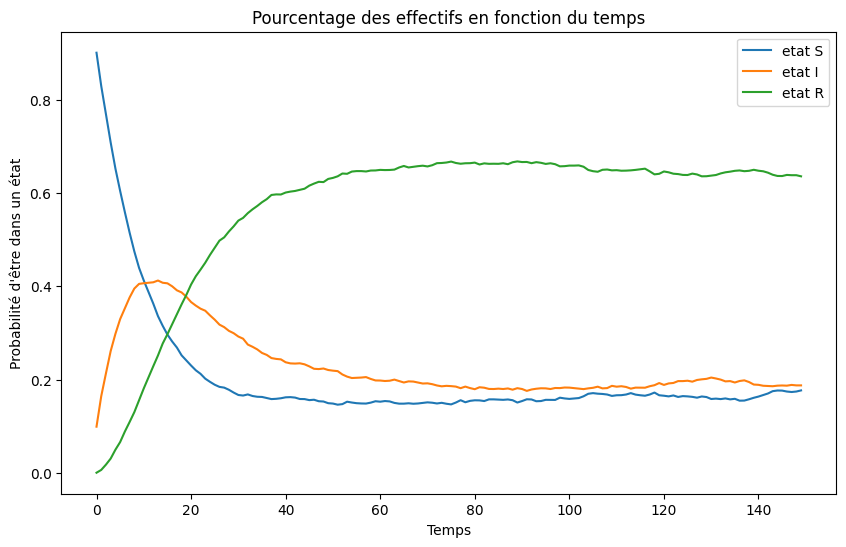

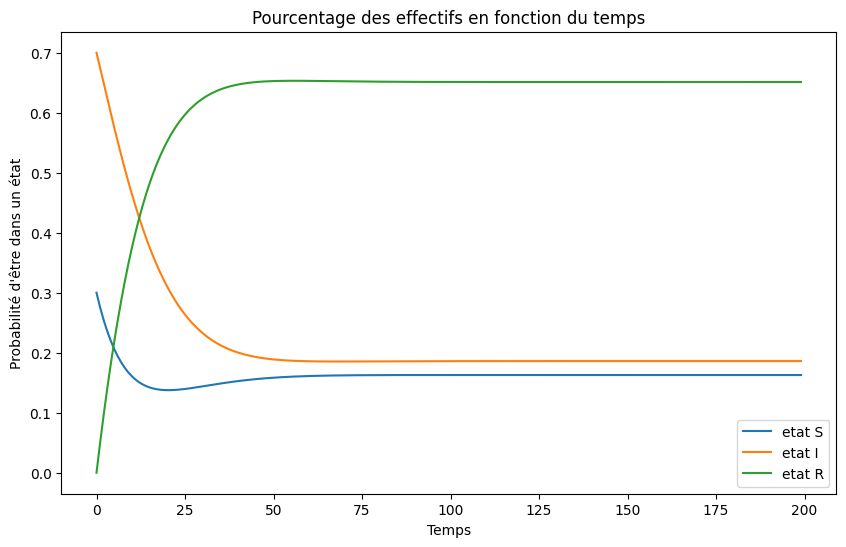

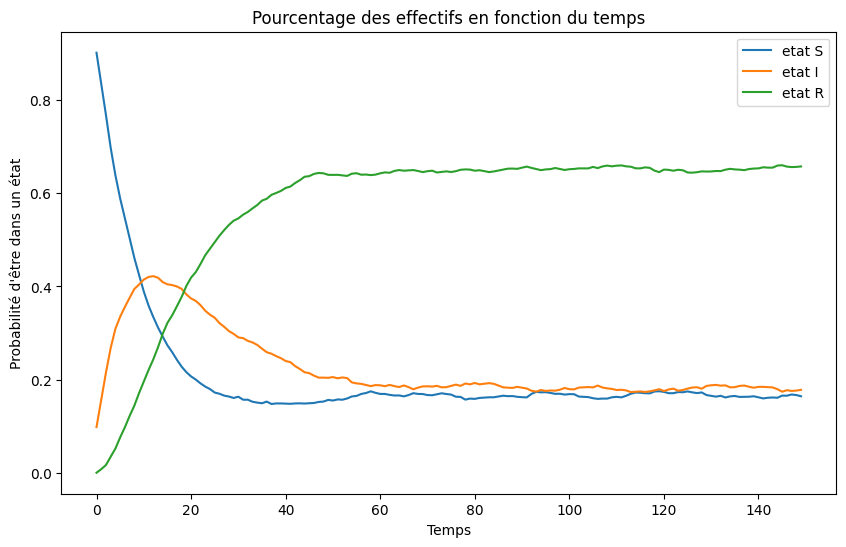

In [13]:
# changement des probas initiales
pi_0 = [0.7, 0.2, 0.1]
# Distribution théorique 
liste_distribution = distribution_etat(A2, pi_0)
affichage_distribution(liste_distribution)
# Distribution observée, simulation avec une population 500 et 5000
affichage_distribution(simulation(5000, 150, A2))

# changement des probas initiales
pi_0 = [0.5, 0.4, 0.1]
# Distribution théorique 
liste_distribution = distribution_etat(A2, pi_0)
affichage_distribution(liste_distribution)
# Distribution observée, simulation avec une population 500 et 5000
affichage_distribution(simulation(5000, 150, A2))

# changement des probas initiales
pi_0 = [0.3, 0.7, 0.0]
# Distribution théorique 
liste_distribution = distribution_etat(A2, pi_0)
affichage_distribution(liste_distribution)
# Distribution observée, simulation avec une population 500 et 5000
affichage_distribution(simulation(5000, 150, A2))

6. Nous avons refait les simulations avec différentes distributions de probabilités intiales (pi0 = [0.7, 0.2, 0.1], pi0 = [0.5, 0.4, 0.1], pi0 = [0.3, 0.7, 0.0]). Nous remarquons que quelque soit la distribution des probabilités initiales, la chaîne de Markov converge toujours vers les mêmes valeurs. Cela revient au fait que la chaîne est érgodique (deja démontré) et donc elle converge toujours vers l'unique distribution stationnaire pout toutes distributions des probabilités initiales.

7. Pour trouver la distribution de probabilité stationnaire il faut trouver pi tel que pi.A = pi.

Nous résolvons le système à 3 inconnus (a,b,c) avec a+b+c=1 et nous trouvons pi = [$7/{43}$, $8/{43}$, $28/{43}$] = [0.163, 0.186, 0.651]. La distribution somme bien à 1.

En effectuant des simulations avec t = 500 et t = 1000, nous remarquons que la chaîne de Markov converge effectivement vers pi, avec S qui converge vers $7/{43}$, I vers $8/{43}$ et R vers $28/{43}$


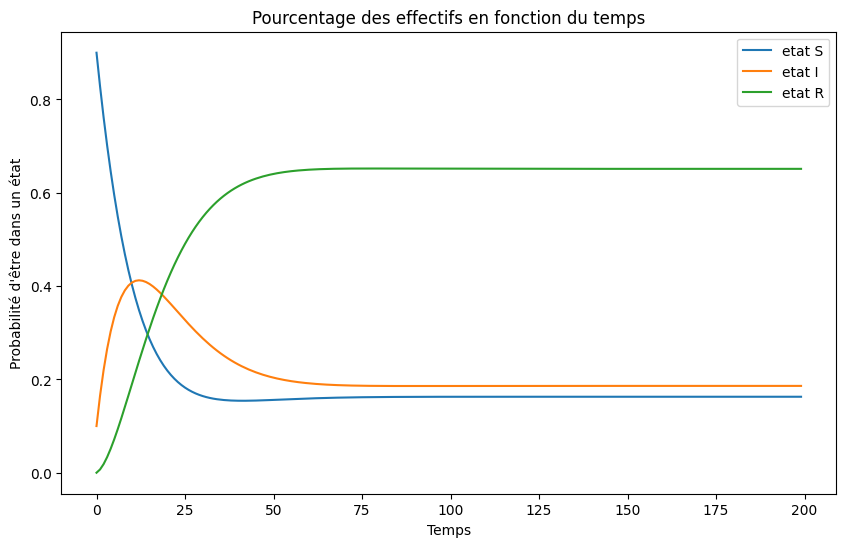

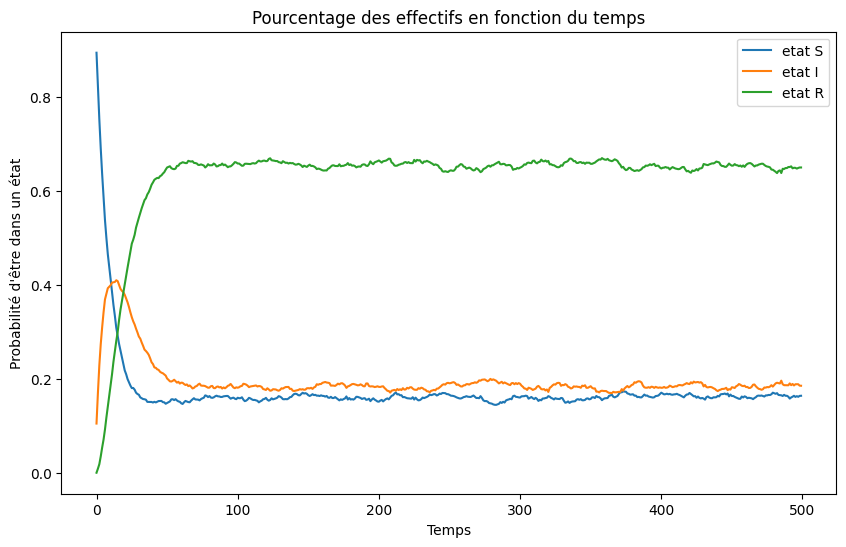

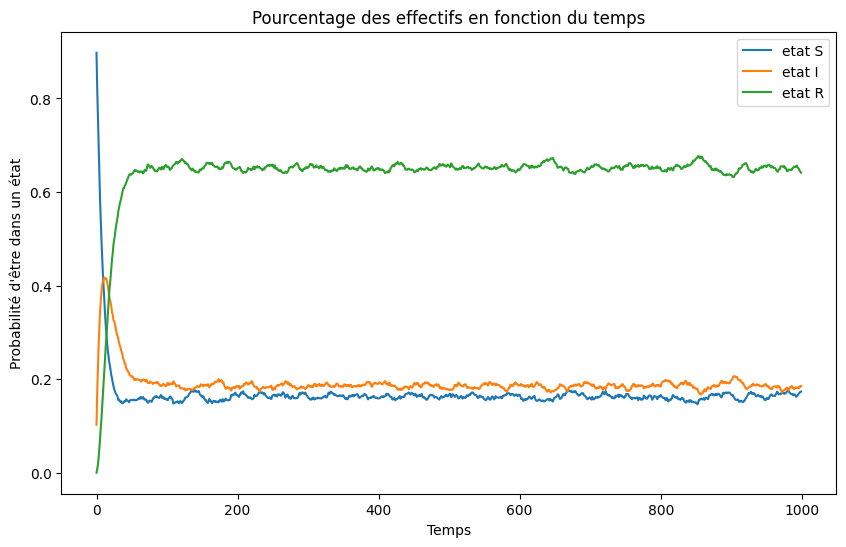

In [14]:
# Distribution théorique 
liste_distribution = distribution_etat(A2, pi0)
affichage_distribution(liste_distribution)
# Distribution observée, simulation avec t = 500 et t = 1000
affichage_distribution(simulation(5000, 500, A2))
affichage_distribution(simulation(5000, 1000, A2))

### 2.2 Longueur de l'immunité

##### Question 1: Estimation de la longueur moyenne d'une séquence de R

In [16]:
def longueur_R_obs(nb_individus, temps):
    I_moyen = []
    pop = seq_alea_population(nb_individus, temps, pi0, A2)
    nb_R = 0
    
    # On parcours la population individu par individu
    # Autrement dit, on parcourt la liste de population de gauche à droite 
    # et de haut en bas (pour la liste 2d représentant cette dernière)

    for k in range(temps * nb_individus) :
        i = k // temps # indice de i
        j = k % temps # indice de j

        if pop[i][j] == 'R': # on regarde l'élement actuel et on incrémente si c'est R
            nb_R += 1
            if pop[i][j+1] != 'R': # on regarde l'élément suivant et si != R, on ajoute la longueur trouvée dans la liste
                I_moyen.append(nb_R)
                nb_R = 0

    return statistics.mean(I_moyen), I_moyen

print(longueur_R_obs(150, 200))

(51.67246376811594, [6, 62, 88, 19, 147, 91, 15, 24, 94, 82, 73, 71, 51, 71, 29, 314, 32, 21, 123, 84, 42, 27, 100, 107, 149, 70, 104, 210, 5, 3, 14, 114, 6, 212, 11, 4, 149, 87, 150, 119, 48, 1, 53, 2, 64, 14, 21, 20, 71, 4, 82, 115, 64, 99, 7, 4, 268, 43, 10, 37, 39, 43, 42, 13, 29, 48, 39, 193, 24, 55, 249, 40, 4, 57, 70, 10, 68, 2, 8, 1, 28, 38, 73, 7, 80, 77, 35, 81, 12, 22, 2, 76, 67, 48, 34, 47, 119, 103, 7, 50, 6, 1, 28, 39, 72, 18, 19, 18, 41, 11, 85, 7, 16, 52, 15, 10, 1, 36, 26, 7, 37, 128, 12, 37, 165, 7, 11, 42, 18, 41, 108, 8, 17, 38, 5, 18, 21, 42, 81, 81, 121, 198, 20, 1, 14, 27, 27, 5, 22, 55, 28, 37, 74, 44, 54, 7, 100, 20, 34, 63, 28, 45, 10, 4, 12, 21, 10, 17, 35, 4, 17, 11, 184, 10, 24, 54, 36, 71, 97, 67, 45, 139, 22, 115, 2, 144, 190, 102, 21, 4, 1, 10, 83, 8, 48, 202, 31, 14, 50, 81, 21, 67, 41, 18, 15, 12, 60, 75, 39, 43, 204, 4, 40, 27, 6, 30, 7, 86, 219, 35, 56, 24, 22, 11, 36, 18, 108, 30, 8, 8, 12, 5, 7, 29, 10, 47, 24, 36, 35, 41, 45, 7, 59, 35, 87, 3, 11,

##### Question 2: Estimation de la longueur théorique d'une séquence de R

On peut modéliser la longueur théorique d'une séquence de R par une loi géométrique de paramètre 0,02.

En effet, pour calculer la longueur théorique d'une séquence R, on cherche à estimer la probabilité de passer de R vers S en étant dans R. C'est la probabilité de succès.


En posant L, la variable aléatoire représentant la longueur d'une séquence R, on observe

P(L=1) = P(S|R) = 0.02 (être dans l'état R une seule fois) 

P(L=2) = P(R|R) x P(S|R) = 0.98 x 0.02 (être dans l'état R deux fois de suite)

P(L=3) = $P(R|R)^2$ x P(S|R) = $0.98^2$ x 0.02 (être dans l'état R trois fois de suite)

P(L=k) = $P(R|R)^{k-1} $ x P(S|R) = $0.98^{k-1}$ x 0.02 (être dans l'état R k fois de suite)



Pour chercher la moyenne de la longueur théorique, on calcule donc l'espérance de la loi géométrique de paramètres 0.02.

$Longueur moyenne = 1/0.02 = 50$


#### Question 3 : Affichage de la distribution théorique et de la distribution observée de la longueur de l'immunité

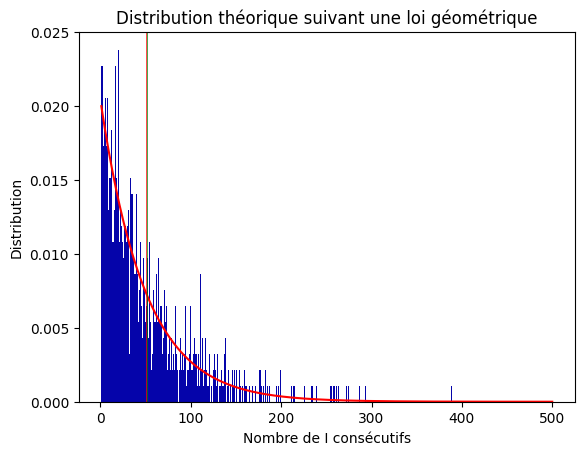

In [21]:
def courbe_dist_observee(nb_individus, temps):
    moyenne ,occurrences = longueur_R_obs(nb_individus, temps)
    plt.axvline(moyenne, color='g', linewidth=0.5, label="Moyenne observée de la longueur de l'immunité") #moyenne observée
    plt.hist(occurrences, bins=max(occurrences), density=True, color='#0504aa')

#On effectue des distributions sur des populations de grandeur élevée pour pouvoir comparer les deux distributions
courbe_dist_theorique(500, 0.02)  #distribution théorique
courbe_dist_observee(150, 500) #distribution observée


### 2.3 Modification du modèle

#### Question 1: Evolution du modèle en changeant la probabilité P(I | S):
Dans cette question, on modifie le modèle en modifiant pour un individu sain la probabilité de devenir infecté

Prenons par exemple: 

``` python
    A3 = np.array([
        [0.6, 0.4, 0], 
        [0.0, 0.93, 0.07], 
        [0.02, 0, 0.98]
    ])
```

La nouvelle distribution de la population est 

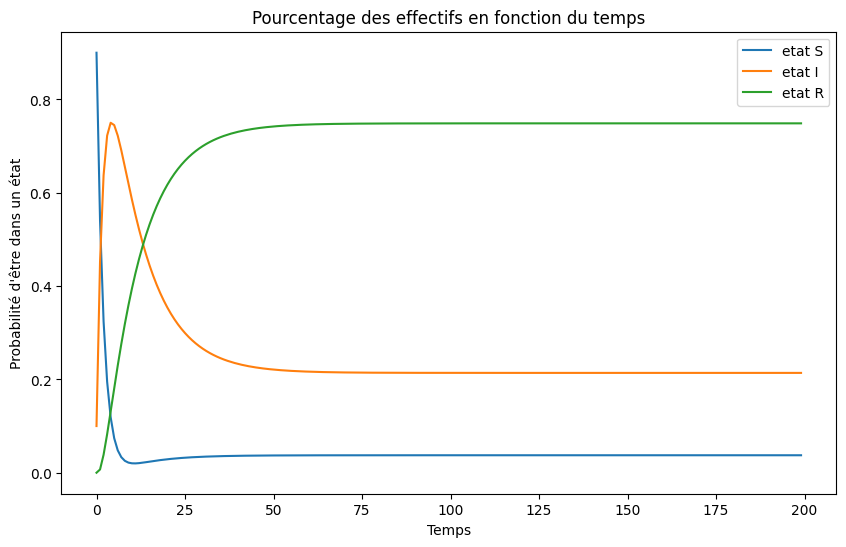

In [177]:
A3 = np.array([
        [0.6, 0.4, 0], 
        [0.0, 0.93, 0.07], 
        [0.02, 0, 0.98]
    ])
affichage_distribution(distribution_etat(A3, pi0))

La nouvelle distribution converge vers: $[7/187, 40/187, 140/187]$ qui est obtenue en résolvant les équations linéaires telles que pi * A3 = pi,
comme la chaîne associé à A3 est bien érgodique. Nous avons augmenté la probabilité de devenir infecté si on est sain, et donc la courbe associée aux infectés converge vers une valeur plus importante, et celle des sains vers une qui est plus faible.

#### Question 2: Evolution du modèle en changeant la probabilité P(S | R):
Dans cette question, on modifie le modèle en modifiant pour un individu guéri la probabilité de devenir sain

Prenons par exemple: 

``` python
    A4 = np.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0.2, 0, 0.8]
    ])
```

La nouvelle distribution de la population est 

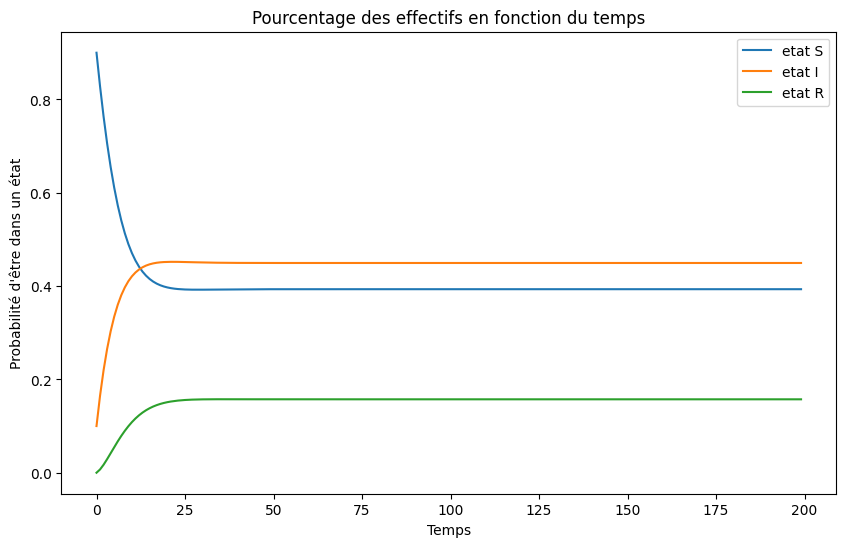

In [162]:
A4 = np.array([
        [0.92, 0.08, 0], 
        [0.0, 0.93, 0.07], 
        [0.2, 0, 0.8]
    ])
affichage_distribution(distribution_etat(A4, pi0))

La nouvelle distribution à l'équilibre est: $[35/89, 40/89, 14/89]$ qui est obtenue en résolvant les équations linéaires telles que pi * A4 = pi (A4 érgodique). Nous avons augmenté la probabilité de perdre l'immunité, donc il y aura plus de personnes qui redeviennet sains, et donc s'infectent potentiellement, ce qui explique la convergence des infectés vers la valeur la plus élevée, et celle des rétablis vers la plus faible.

## 3. Vaccination

1. Par rapport au modèle précédent, on remarque que la probabilité d'être dans l'état S et de passer dans l'état I devient plus faible et que la probabilité de rester dans l'état I a également diminué (en changeant aussi la probabilité de passer vers l'état R). De ce fait, la distribution de la population dans l'état I diminue.

2. Représentation graphique de la distribution théorique

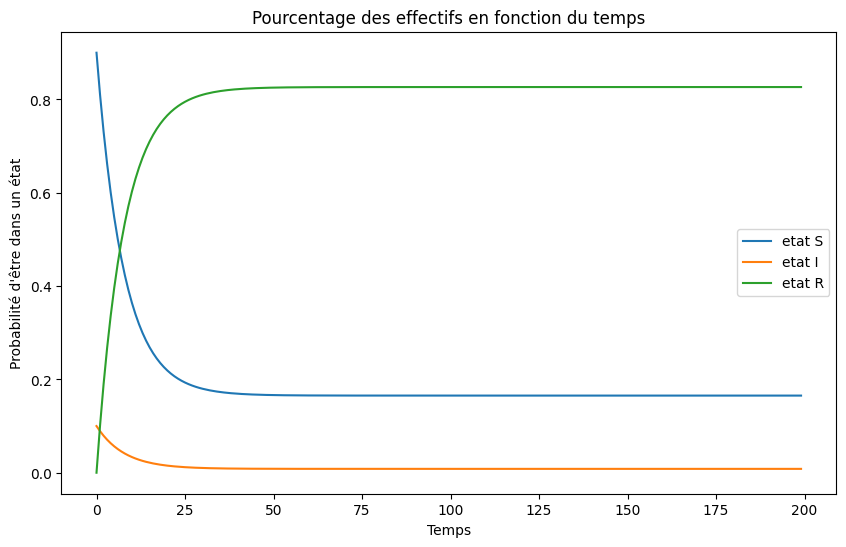

In [178]:
MatriceVaccin = np.array(
                        [[0.9 , 0.01, 0.09], 
                         [0. , 0.8 , 0.2 ], 
                         [0.02, 0. , 0.98]])

affichage_distribution(distribution_etat(MatriceVaccin, pi0))

3. Comparaison des distributions stationnaires

In [22]:
def comp_dist_stationnaires():
    # par résolution manuelle, on a trouvé :
    stationnaire1 = [0.163, 0.186, 0.651]
    stationnaire2 = [0.165, 0.008, 0.836]

    # États
    etats = ['Sain', 'Infectés', 'Guéri']

    # Largeur des barres
    largeur = 0.35

    # Position des barres
    pos1 = np.arange(len(etats))
    pos2 = pos1 + largeur

    # Créer des barres pour chaque état
    plt.bar(pos1, stationnaire1, width=largeur, alpha=0.7, label='Modèle 2')
    plt.bar(pos2, stationnaire2, width=largeur, alpha=0.7, label='Modèle Vaccin')

    # Légendes
    plt.xlabel('États')
    plt.ylabel('Probabilités')
    plt.title('Probabilité Stationnaire Stationnaire par État')
    plt.legend()

    # Affichage
    plt.show()


comp_dist_stationnaires()



NameError: name 'etats' is not defined